In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Format the dataset for YOLO friendly format

In [3]:
import os
import shutil
from pathlib import Path

# Input dataset root (contains multiple class folders)
source_root = Path("/kaggle/input/urban-issues-dataset")

# Output YOLO dataset root
output_root = Path("/kaggle/working/dataset")
splits = ["train", "valid", "test"]

# Create YOLO folders
for split in splits:
    (output_root / "images" / split).mkdir(parents=True, exist_ok=True)
    (output_root / "labels" / split).mkdir(parents=True, exist_ok=True)

# Loop through each class folder
for class_folder in source_root.iterdir():
    if class_folder.is_dir():
        for split in splits:
            img_dir = class_folder / class_folder.name / split / "images"
            label_dir = class_folder / class_folder.name / split / "labels"

            if not img_dir.exists() or not label_dir.exists():
                continue  # skip if split doesn't exist for this class

            for img_file in img_dir.glob("*.*"):
                src_label_path = label_dir / f"{img_file.stem}.txt"

                # If label file doesn't exist, skip
                if not src_label_path.exists():
                    continue

                # Check if label file contains invalid lines (> 5 elements)
                remove_file = False
                with open(src_label_path, "r") as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) > 5:
                            remove_file = True
                            break

                if remove_file:
                    continue  # Skip copying invalid files

                # Copy valid image
                dest_img_path = output_root / "images" / split / f"{class_folder.name}_{img_file.name}"
                shutil.copy(img_file, dest_img_path)

                # Copy valid label
                dest_label_path = output_root / "labels" / split / f"{class_folder.name}_{img_file.stem}.txt"
                shutil.copy(src_label_path, dest_label_path)

print("YOLO dataset ready at:", output_root)

YOLO dataset ready at: /kaggle/working/dataset


In [4]:
# import shutil
# import os

# output_dir = "/kaggle/working"

# # Delete everything inside the directory
# for filename in os.listdir(output_dir):
#     file_path = os.path.join(output_dir, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)  # remove file
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)  # remove foldear
#     except Exception as e:
#         print(f"Failed to delete {file_path}. Reason: {e}")

# print("/kaggle/working cleared")

# Train the model

In [5]:
# Use the model
results = model.train(data="/kaggle/input/urban-issues-dataset/config.yaml", epochs=90)  # train the model

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/urban-issues-dataset/config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1209.5±600.2 MB/s, size: 76.7 KB)


train: Scanning /kaggle/working/dataset/labels/train... 25075 images, 354 backgrounds, 0 corrupt: 100%|██████████| 25075/25075 [00:20<00:00, 1239.99it/s]

train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (236).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (237).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (239).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (240).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/IllegalParking_30717230707_cc09c3e457_b_jpg.rf.1d5a1334fabe41fd6f5f19a2d25ac002.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_30717230707_cc09c3e457_b_jpg.rf.65c3ceebe756b8b3ab49c0987e78d404.jpg: 2 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_392C51FF00000578-0-image-a-11_1475781587245_jpg.rf.40a8bda830db6d5dba20687d03b78dc6.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_39

train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 779.3±587.7 MB/s, size: 70.4 KB)


val: Scanning /kaggle/working/dataset/labels/valid... 3279 images, 63 backgrounds, 0 corrupt: 100%|██████████| 3279/3279 [00:02<00:00, 1379.28it/s]


val: New cache created: /kaggle/working/dataset/labels/valid.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      2.44G        3.3      4.578      3.953         17        640: 100%|██████████| 1568/1568 [04:39<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:22<00:00,  4.55it/s]


                   all       3279       6155      0.576     0.0512    0.00838    0.00199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      2.71G      2.214      3.551      2.705          9        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.13it/s]


                   all       3279       6155      0.538     0.0918     0.0603     0.0267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      2.73G      1.948      3.045      2.321          9        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.04it/s]


                   all       3279       6155      0.357      0.196      0.121     0.0526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      2.74G       1.85      2.822      2.171          7        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.28it/s]


                   all       3279       6155      0.529      0.196      0.145      0.069

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      2.75G      1.773      2.651      2.069          5        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.16it/s]


                   all       3279       6155      0.561      0.223      0.194     0.0958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      2.77G      1.722      2.518      2.009         27        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.19it/s]


                   all       3279       6155      0.559      0.238      0.204      0.097

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      2.78G      1.681      2.414      1.956         15        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.34it/s]


                   all       3279       6155      0.512      0.261      0.233      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      2.79G      1.641       2.32      1.917         18        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.482      0.285      0.257      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90       2.8G      1.627      2.267       1.89          9        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.25it/s]


                   all       3279       6155      0.539      0.293      0.281      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      2.81G      1.606      2.207      1.869          6        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.18it/s]


                   all       3279       6155      0.429      0.346      0.298      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      2.99G       1.59      2.176      1.851          9        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.19it/s]


                   all       3279       6155      0.541      0.314       0.32      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90         3G      1.573      2.121      1.828         12        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.14it/s]


                   all       3279       6155      0.559      0.339      0.343      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      3.01G      1.561      2.096      1.817          5        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.482      0.348      0.339       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      3.02G      1.542      2.057      1.804         11        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.17it/s]


                   all       3279       6155      0.496      0.373      0.361      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      3.04G      1.537      2.041      1.794          5        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.11it/s]


                   all       3279       6155      0.498      0.389      0.369      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      3.04G      1.529      2.003      1.779          9        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.06it/s]


                   all       3279       6155      0.498      0.394      0.382      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      3.06G      1.512      1.976      1.768         23        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.22it/s]


                   all       3279       6155      0.549      0.383       0.39      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      3.07G      1.503      1.958       1.76          5        640: 100%|██████████| 1568/1568 [04:33<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.07it/s]


                   all       3279       6155      0.525      0.411      0.397      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      3.08G        1.5      1.943       1.75         11        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.22it/s]


                   all       3279       6155      0.544      0.417      0.402      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      3.09G      1.499      1.925      1.753         14        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.03it/s]


                   all       3279       6155      0.573      0.404      0.413      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      3.27G      1.488      1.913       1.74         11        640: 100%|██████████| 1568/1568 [04:33<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.13it/s]


                   all       3279       6155      0.579      0.424       0.43      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      3.28G      1.477      1.894      1.733          4        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.11it/s]


                   all       3279       6155      0.591      0.412       0.43      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      3.47G      1.478      1.874      1.727         23        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.23it/s]


                   all       3279       6155      0.592      0.432      0.439      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      3.49G      1.464      1.848      1.718          9        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.17it/s]


                   all       3279       6155      0.612      0.419      0.442       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90       3.5G      1.461      1.841      1.715         30        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.35it/s]


                   all       3279       6155      0.606      0.451      0.447      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      3.51G      1.457      1.825      1.714         13        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.35it/s]


                   all       3279       6155      0.597      0.443      0.449       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      3.52G      1.456      1.817      1.709          9        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.29it/s]


                   all       3279       6155      0.632      0.434      0.464      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      3.53G      1.451      1.817      1.704         11        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.33it/s]


                   all       3279       6155      0.628      0.444      0.459      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      3.54G       1.44      1.792      1.699          7        640: 100%|██████████| 1568/1568 [04:24<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.20it/s]


                   all       3279       6155       0.63      0.446       0.46      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      3.55G      1.444      1.782       1.69         21        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.41it/s]


                   all       3279       6155        0.5      0.438      0.467      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      3.56G      1.432      1.758      1.686         21        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.47it/s]


                   all       3279       6155      0.524      0.442      0.478       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      3.58G      1.431      1.752      1.683         16        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.34it/s]


                   all       3279       6155      0.532      0.452      0.486      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      3.59G      1.429      1.753      1.685          6        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.42it/s]


                   all       3279       6155       0.66      0.442      0.487      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90       3.6G      1.418      1.728      1.671         29        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.95it/s]


                   all       3279       6155       0.66      0.442      0.489       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      3.61G      1.421      1.733      1.672         15        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.94it/s]


                   all       3279       6155      0.645      0.461      0.492      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      3.62G      1.416      1.713      1.665         13        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.651      0.456      0.493      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      3.63G      1.412       1.71      1.663          8        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.36it/s]


                   all       3279       6155      0.667      0.447      0.496      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      3.64G      1.414      1.705      1.667          8        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.671      0.453      0.498       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      3.66G        1.4       1.68       1.65         11        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.15it/s]


                   all       3279       6155      0.654      0.458      0.497      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      3.67G        1.4      1.676      1.651          5        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.03it/s]


                   all       3279       6155      0.662      0.457      0.499      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      3.68G      1.394      1.677      1.652          8        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.97it/s]


                   all       3279       6155      0.532      0.472      0.499      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      3.69G      1.383      1.653      1.641         22        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.18it/s]


                   all       3279       6155      0.539      0.478      0.503      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90       3.7G      1.388      1.649      1.638          8        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.34it/s]


                   all       3279       6155      0.545      0.477      0.504      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90       3.9G      1.387      1.644       1.64          8        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.656      0.479      0.506      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      3.91G      1.377      1.632      1.632         16        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.37it/s]


                   all       3279       6155      0.667      0.473      0.505      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      3.92G      1.377      1.627      1.624          5        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.32it/s]


                   all       3279       6155      0.662      0.479      0.506      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      3.93G      1.369       1.62      1.624          3        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.32it/s]


                   all       3279       6155      0.659      0.474      0.507      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      3.95G      1.365      1.603      1.616          9        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.656      0.481       0.51      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      3.96G      1.367      1.602      1.618         12        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.40it/s]


                   all       3279       6155       0.66       0.48      0.511      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      3.97G      1.363      1.598      1.619         16        640: 100%|██████████| 1568/1568 [04:36<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.26it/s]


                   all       3279       6155      0.656      0.483      0.512       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      3.98G      1.368      1.593      1.616         56        640: 100%|██████████| 1568/1568 [04:35<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.35it/s]


                   all       3279       6155      0.656      0.491      0.513       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      3.99G      1.358      1.573      1.611         10        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.33it/s]


                   all       3279       6155      0.537      0.498      0.515      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90         4G       1.36      1.575      1.611          4        640: 100%|██████████| 1568/1568 [04:33<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155       0.54      0.498      0.517      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      4.01G       1.35      1.561      1.603         20        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.37it/s]


                   all       3279       6155      0.569        0.5      0.518      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      4.03G      1.343      1.554      1.596          6        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.33it/s]


                   all       3279       6155      0.575        0.5       0.52      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      4.04G      1.353       1.55        1.6         16        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.01it/s]


                   all       3279       6155      0.582      0.502      0.522      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      4.05G      1.337      1.543      1.593         11        640: 100%|██████████| 1568/1568 [04:29<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.10it/s]


                   all       3279       6155      0.581      0.507      0.523      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      4.06G       1.34      1.536      1.588          8        640: 100%|██████████| 1568/1568 [04:35<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.21it/s]


                   all       3279       6155      0.583      0.507      0.525      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      4.07G      1.333      1.525      1.587          8        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.29it/s]


                   all       3279       6155      0.576      0.508      0.525      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      4.08G      1.333      1.527       1.59         12        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.19it/s]


                   all       3279       6155      0.576      0.508      0.526      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      4.09G      1.328      1.516      1.579          5        640: 100%|██████████| 1568/1568 [04:33<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.28it/s]


                   all       3279       6155      0.592      0.504      0.526      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90       4.1G      1.325      1.511       1.58         15        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.577      0.509      0.527        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      4.12G      1.321      1.499      1.576          8        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.93it/s]


                   all       3279       6155      0.579       0.51      0.528        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      4.13G      1.323      1.493      1.573         19        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.03it/s]


                   all       3279       6155      0.583      0.509      0.528        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      4.14G      1.317      1.485       1.57         23        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.30it/s]


                   all       3279       6155      0.587      0.507       0.53      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      4.15G      1.323      1.484      1.571          4        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.21it/s]


                   all       3279       6155      0.571      0.506       0.53      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      4.16G      1.307      1.467      1.561          8        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.35it/s]


                   all       3279       6155       0.59      0.504       0.53      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      4.17G      1.312      1.473      1.562         14        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.594      0.505      0.531      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      4.19G      1.299      1.454      1.555          6        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.592      0.506      0.533      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90       4.2G      1.297      1.448      1.549         13        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.43it/s]


                   all       3279       6155      0.591      0.509      0.534      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      4.21G      1.299      1.446      1.552         13        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.41it/s]


                   all       3279       6155      0.591      0.508      0.535      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      4.22G      1.289      1.434      1.546          8        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.39it/s]


                   all       3279       6155      0.588       0.51      0.535      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      4.23G      1.287      1.425      1.542          6        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:21<00:00,  4.84it/s]


                   all       3279       6155       0.59      0.511      0.536      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      4.24G      1.287      1.413      1.544         11        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.03it/s]


                   all       3279       6155       0.59      0.511      0.538      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      4.25G      1.289      1.419      1.541         11        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.37it/s]


                   all       3279       6155      0.588      0.515      0.538      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      4.27G      1.281      1.403      1.536          9        640: 100%|██████████| 1568/1568 [04:32<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.35it/s]


                   all       3279       6155      0.589      0.522      0.541       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      4.28G      1.277      1.396      1.534          8        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.49it/s]


                   all       3279       6155      0.586      0.521      0.541      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      4.29G      1.269      1.386       1.53         11        640: 100%|██████████| 1568/1568 [04:31<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.38it/s]


                   all       3279       6155      0.597      0.528      0.543      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90       4.3G      1.267       1.38      1.528         10        640: 100%|██████████| 1568/1568 [04:33<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.41it/s]


                   all       3279       6155      0.597      0.528      0.544      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      4.31G      1.267      1.377      1.527          8        640: 100%|██████████| 1568/1568 [04:30<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.34it/s]


                   all       3279       6155      0.584      0.528      0.544      0.314
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      4.32G      1.335      1.314      1.611          5        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.41it/s]


                   all       3279       6155      0.585      0.528      0.544      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      4.33G      1.322      1.287      1.597          5        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.39it/s]


                   all       3279       6155       0.59      0.527      0.546      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      4.35G      1.307      1.262      1.588          3        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.36it/s]


                   all       3279       6155      0.597      0.526      0.547      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      4.36G      1.303      1.256      1.582          3        640: 100%|██████████| 1568/1568 [04:28<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.18it/s]


                   all       3279       6155      0.585      0.529      0.547      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      4.37G      1.296      1.241      1.579          7        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.37it/s]


                   all       3279       6155      0.588       0.53      0.549      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      4.38G      1.288      1.226      1.568          5        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.34it/s]


                   all       3279       6155      0.589       0.53      0.549      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      4.39G      1.282       1.22      1.563          5        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.33it/s]


                   all       3279       6155      0.597      0.536      0.551      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90       4.4G      1.276      1.211       1.56          4        640: 100%|██████████| 1568/1568 [04:27<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.45it/s]


                   all       3279       6155        0.6      0.536      0.552       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      4.41G      1.272      1.205       1.56          7        640: 100%|██████████| 1568/1568 [04:26<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:18<00:00,  5.44it/s]


                   all       3279       6155      0.595      0.539      0.553      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      4.42G      1.267      1.195      1.555          2        640: 100%|██████████| 1568/1568 [04:25<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.598      0.539      0.555      0.323

90 epochs completed in 7.279 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.13it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3279       6155      0.599      0.539      0.555      0.323
   Damaged Road issues        727       1338      0.572      0.377      0.421      0.203
        Pothole Issues        570       1818       0.61      0.458      0.509      0.221
Illegal Parking Issues         24         38      0.263      0.105      0.074     0.0147
Broken Road Sign Issues         41         41      0.788      0.878      0.897      0.632
          Fallen trees        982       1237      0.737      0.634      0.707      0.395
Littering/Garbage on Public Places        660       1175      0.632      0.596      0.636      0.423
      Vandalism Issues        208        393      0.555      0.626      0.638      0.439
 Dead Animal Pollution         25         25      0.627       0.64      0.552      0.276
Damaged Electric wires and poles         81         90      0.607      0.533      0.563        0.3
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Resul

# Results

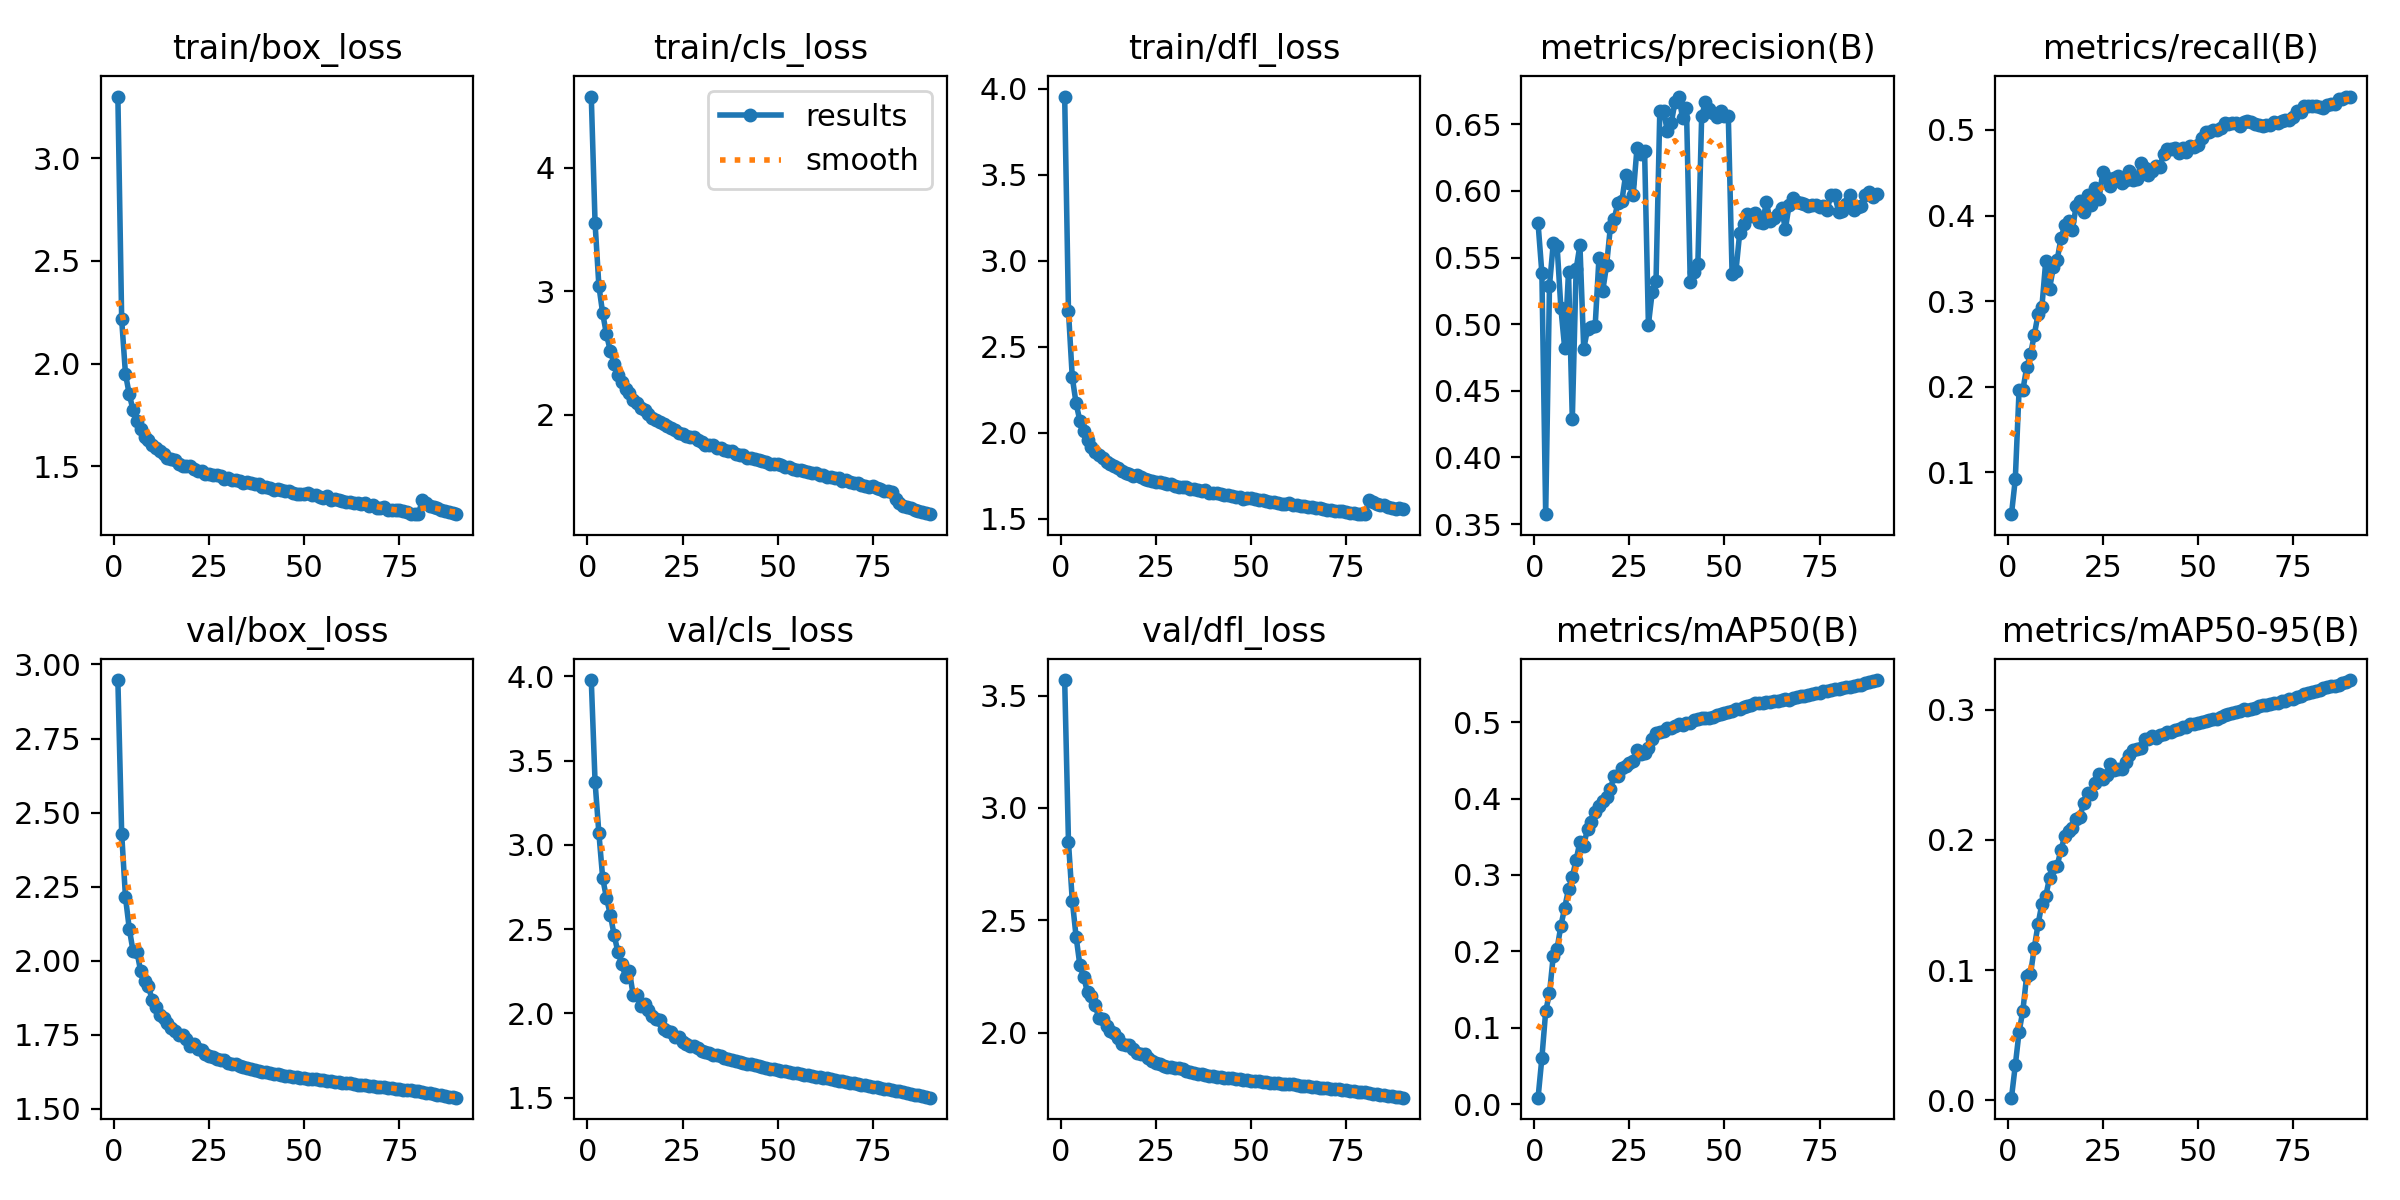

In [6]:
from IPython.display import Image, display
import os

train_dir = "/kaggle/working/runs/detect/train"

display(Image(filename=os.path.join(train_dir, "results.png")))

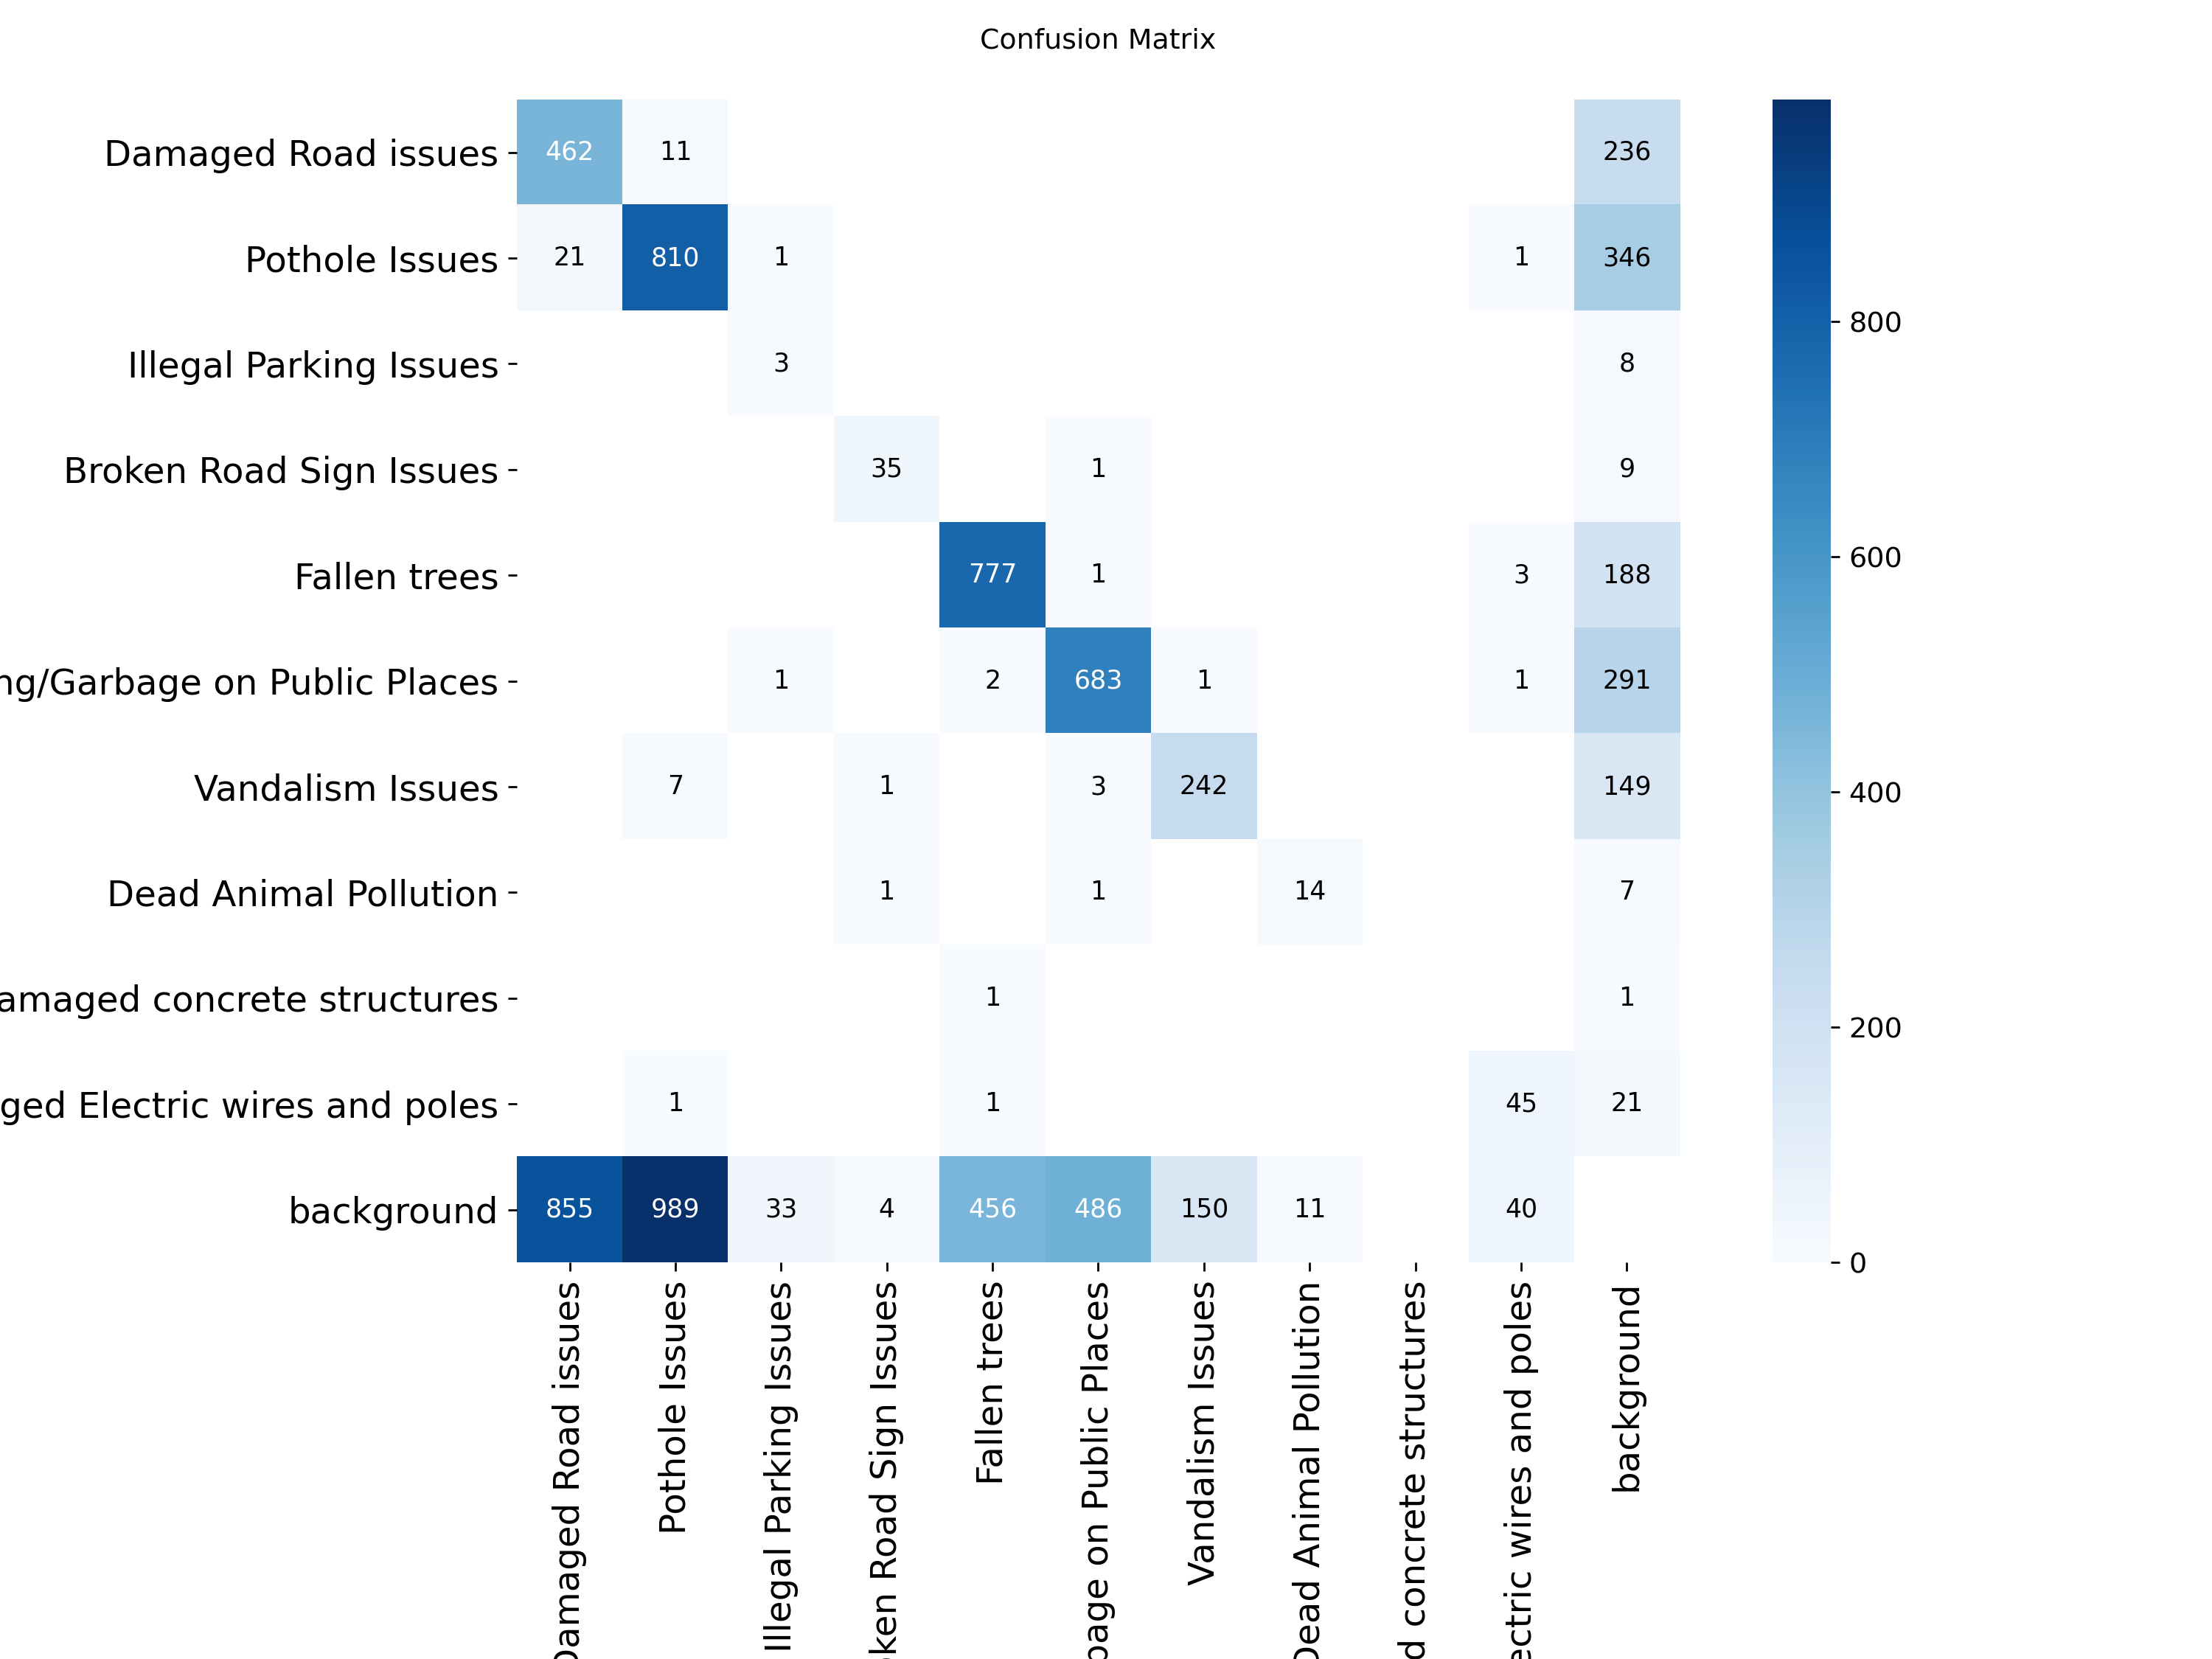

In [7]:
# Display final validation predictions
display(Image(filename=os.path.join(train_dir, "confusion_matrix.png")))

# Testing


image 1/1 /kaggle/input/urban-issues-dataset/Potholes and RoadCracks/Potholes and RoadCracks/test/images/181_jpg.rf.8d1f5e11badb48443564cc4de81e5520.jpg: 640x640 2 Pothole Issuess, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


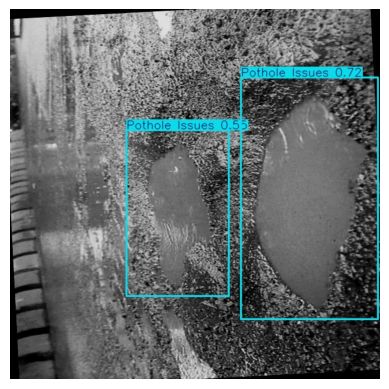

In [8]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/Potholes and RoadCracks/Potholes and RoadCracks/test/images/181_jpg.rf.8d1f5e11badb48443564cc4de81e5520.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output1.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/Damaged concrete structures/Damaged concrete structures/test/images/dacl10k_v2_train_0026_jpg.rf.8a413dd3b08b6809284a35ad6bbd55c7.jpg: 640x640 1 Vandalism Issues, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


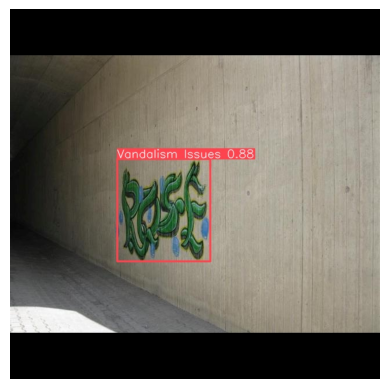

In [9]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/Damaged concrete structures/Damaged concrete structures/test/images/dacl10k_v2_train_0026_jpg.rf.8a413dd3b08b6809284a35ad6bbd55c7.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output2.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/FallenTrees/FallenTrees/test/images/295_jpg.rf.a96c9f64bbff9db66e3eeee3318be04c.jpg: 640x640 2 Fallen treess, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


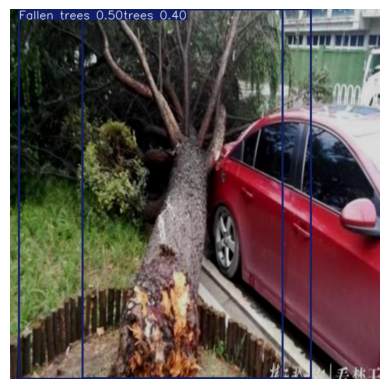

In [10]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/FallenTrees/FallenTrees/test/images/295_jpg.rf.a96c9f64bbff9db66e3eeee3318be04c.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output3.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/DamagedRoadSigns/DamagedRoadSigns/test/images/IMG_8919_jpg.rf.9b9499eeb84f718c8b9cbe2bc50f1765.jpg: 640x640 1 Broken Road Sign Issues, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


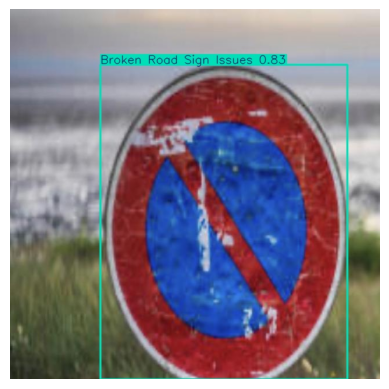

In [11]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/DamagedRoadSigns/DamagedRoadSigns/test/images/IMG_8919_jpg.rf.9b9499eeb84f718c8b9cbe2bc50f1765.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output4.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()